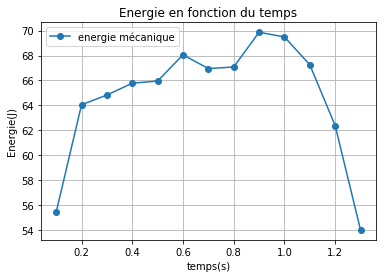

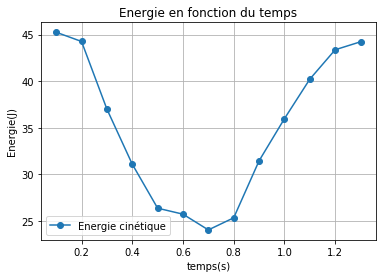

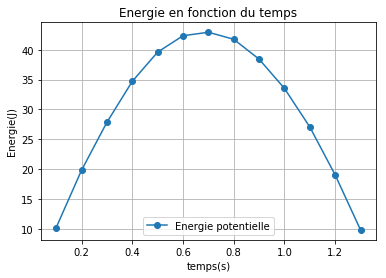

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
#On importe les bibliothèques et les modules nécessaires.

from math import *
import numpy as np
import matplotlib.pyplot as plt


#définition d'une fonction permettant de calculer la dérivée à un instant donné
# les conditions initiales sont imposées par défaut.
def derivation(position1=0,position2=1,instant1=0,instant2=1):
    #initialisation d'une variable globale v 
    global derivee
    derivee=0
    derivee=(position2-position1)/(instant2-instant1)
    
#définition d'une fonction premettant de calculer la norme d'un vecteur ou une distance
def module (valeurx=0,valeury=0):
    global norme
    norme=0
    norme= sqrt(valeurx*valeurx+valeury*valeury) 

#définition d'une fonction pour calculer l'énergie cinétique d'un système
# la vitesse et la masse sont définies par défaut. On peut être amener à changer la masse.    
def energie_cinetique( v=1 , masse=2 ):
    global energiecinetique
    energiecinétique=0
    energiecinetique=0.5*masse*v*v
    #Si nécessaire pour vérifier le bon fonctionnement de la fonction retirer # devant print.
    #print (energiecinetique)

#définition d'une fonction pour calculer l'énergie potentielle d'un système
# la position et la masse sont définies par défaut. On peut être amener à changer la masse.
def energie_potentielle(position=0,masse=2):
    global energiepotentielle
    energiepotentielle=0
    energiepotentielle=masse*9.8*position
    #Si nécessaire pour vérifier le bon fonctionnement de la fonction retirer # devant print.
    #print(energiepotentielle)

#définition d'une fonction pour calculer l'énergie potentielle d'un système
def energie_mecanique():
    global energiemecanique
    energiemecanique=0
    energiemecanique= energiepotentielle+energiecinetique
    #Si nécessaire pour vérifier le bon fonctionnement de la fonction retirer # devant print.
    #print(energiemecanique)
    
def representation_graphique (abscisse=[1],ordonnee=[1],etiquette="légende",titre="Energie en fonction du temps",abs="temps(s)",ordo="Energie(J)"):
    plt.plot(abscisse,ordonnee,'o-',label=etiquette)
    plt.grid()
    plt.legend()
    plt.xlabel(abs)
    plt.ylabel(ordo)
    plt.title(titre)
    plt.show() 
    

#programme prinipal

#entrer les positions du système suivant les deux axes du repère.
X=np.array([0.01,0.41,0.91,1.39,1.86,2.33,2.81,3.33,3.79,4.31,4.83,5.36,5.86,6.34,6.77])
Y=np.array([0.01,0.52,1.01,1.42,1.77,2.02,2.16,2.19,2.13,1.96,1.71,1.38,0.97,0.50,0])
# repérage temporel des positions à partir de la fréquence d'aquisition et du nombre total de points.
temps=[]
for i in range(len(X)): 
    t=0.1*i
    temps.append(t)
#initialisation des deux listes qui recevront les valeurs des. vitesses instantanées suivant les deux axes.
vity=[]
vitx=[]
#initialisation de la liste recevant la valeur de la vitesse.
vinstantanee=[]
#initialisation des listes recevant les valeurs des differentes energies.
ecinetique=[]
epotentielle=[]
emecanique=[]
#calcul des énergies pour les différentes positions utilisation d'une boucle for.
for i in range(len(X)-2):
    derivation(Y[i],Y[i+2],temps[i],temps[i+2])
    vity.append(derivee)
    derivation (X[i], X[i+2],temps[i],temps[i+2])
    vitx.append(derivee)
    module(vitx[i],vity[i])
    vinstantanee.append(norme)
    energie_cinetique(norme,2)
    ecinetique.append(energiecinetique)
    energie_potentielle(Y[i+1],2)
    epotentielle.append(energiepotentielle)
    energie_mecanique()
    emecanique.append(energiemecanique)
# On ajuste le nombre d'éléments des deux listes en enlevant le premier et le dernier éléments de la liste des instants.
tps=temps[1:-1]
#modifier les arguments des différents paramètres de ces fonctions pour obtenir l'affichage désiré.Selon l'exemple ci-dessous.
representation_graphique(tps,emecanique,"energie mécanique",)
representation_graphique(tps,ecinetique,"Energie cinétique")
representation_graphique(tps,epotentielle,"Energie potentielle")


